https://www.kaggle.com/code/mohamedfawzy911/netflix-content-strategy-analysis-with-python/notebook
just verify whether this dataset is same as the dataset i used here

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv('netflix_content.csv')

In [23]:
data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


Let's clean the data for analysis. 
Cleaning "Hours Viewed" column: 
Since the datatype of this column is str, I need to convert it to integer type for numerical analysis. 
If I try to convert the column directly to integer type using 
        data['Hours Viewd'].astype(int)
it will throw an error because the numbers in the column are comma separated. So first, I need to remove those commas(using .str.replace(',', '')), then convert it to integer type (using '.astype('Int64')'). 

In [26]:
data['Hours Viewed'] = data['Hours Viewed'].str.replace(',','').astype('Int64')

Let's now see which kind of content is watched more(is it movies or is it shows???)

For this purpose, let's group the data on the basis of 'Content Type' & then sum it up to find total number of views watched in the corresponding content type(using '.groupby('Content Type')['Hours Viewed'].sum()')
It will give content_type_viewed with 'Content Type' as index. For visualization purposes, I reset the index so that 'Content Type' is now a column in content_type_viewed.

In [29]:
content_type_viewed = data.groupby('Content Type')['Hours Viewed'].sum()
content_type_viewed = content_type_viewed.reset_index()
content_type_viewed

,Content Type,Hours Viewed
0,Movie,50637800000
1,Show,107764100000


Here, I am going to convert the hours viewed to billions format by dividing each number by 10 ^ 9(using .apply(lambda hour: hour / 1e9)')

In [31]:
content_type_viewed['Hours Viewed(in Billions)'] = content_type_viewed['Hours Viewed'].apply(lambda hour: hour / 1e9)
content_type_viewed

,Content Type,Hours Viewed,Hours Viewed(in Billions)
0,Movie,50637800000,50.6378
1,Show,107764100000,107.7641


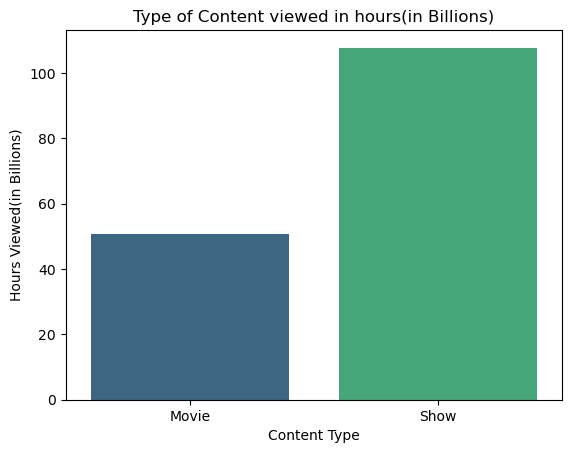

In [32]:
sns.barplot(content_type_viewed, x= 'Content Type', y= 'Hours Viewed(in Billions)', hue= 'Content Type', palette= 'viridis')
plt.title('Type of Content viewed in hours(in Billions)')
plt.show()

From the above visualization, you can clearly see people are more tilting towards shows than movies.

Now, let's analyze whether language is a factor for viewership hours.

In [35]:
language_type_viewed = data.groupby('Language Indicator')['Hours Viewed'].sum()
language_type_viewed = language_type_viewed.reset_index()
language_type_viewed

,Language Indicator,Hours Viewed
0,English,124441700000
1,Hindi,926100000
2,Japanese,7102000000
3,Korean,15378400000
4,Non-English,10439100000
5,Russian,114600000


In [36]:
language_type_viewed['Hours Viewed(in Billions)'] = language_type_viewed['Hours Viewed'].apply(lambda hour: hour / 1e9)
language_type_viewed

,Language Indicator,Hours Viewed,Hours Viewed(in Billions)
0,English,124441700000,124.4417
1,Hindi,926100000,0.9261
2,Japanese,7102000000,7.1020
3,Korean,15378400000,15.3784
4,Non-English,10439100000,10.4391
5,Russian,114600000,0.1146


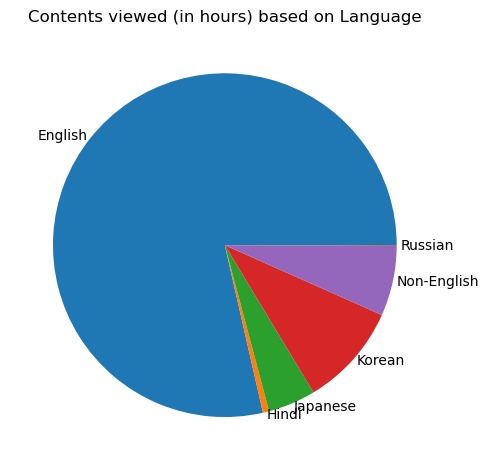

In [37]:
plt.pie(language_type_viewed['Hours Viewed(in Billions)'], labels= language_type_viewed['Language Indicator'], labeldistance= 1.02)
plt.title('Contents viewed (in hours) based on Language')
plt.tight_layout()
plt.show()

From the above pie chart,  you can clearly see content in 'English' language is dominating on the Netflix, i.e., most of the viewers are preferring content in English. Although 'Non-English' & 'Korean' contents have a significant number of viewership hours, but it's not as great as contents in 'English'.

Now, let's analyze how viewership varies based on release dates to identify any trends over time, such as seasonality or patterns around specific months.
For this purpose, I'll first convert the 'Release Date' column to datatime format to analyze the data easily & then I'll extract month in which the content was released & store it in a new column 'Release Month'.

In [40]:
data['Release Date'] =  pd.to_datetime(data['Release Date'])

In [41]:
data['Release Month'] = data['Release Date'].dt.month

Now to analyze the trend based on release month, let's group the data based on 'Release Month' & then sum the hours watched to find the total no. of hours watched by viewers per month

In [43]:
monthly_viewer = data.groupby('Release Month')['Hours Viewed'].sum().reset_index()

In [44]:
monthly_viewer['Hours Viewed(in Billions)'] = monthly_viewer['Hours Viewed'].apply(lambda hour: hour / 1e9)

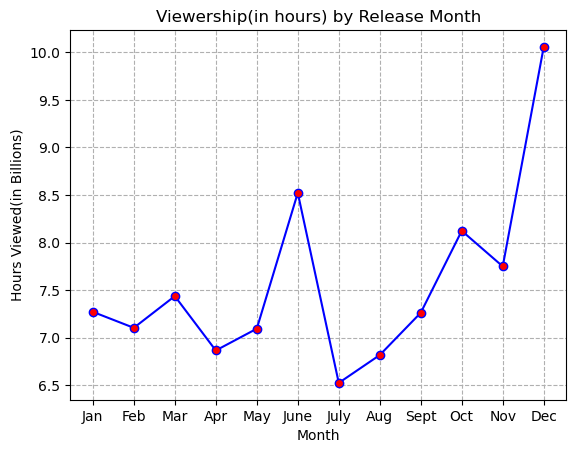

In [45]:
plt.plot(monthly_viewer['Release Month'], monthly_viewer['Hours Viewed(in Billions)'], marker= 'o', markerfacecolor= 'red', color= 'blue')
plt.xticks([i for i in range(1, 13)] ,['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.title('Viewership(in hours) by Release Month')
plt.xlabel('Month')
plt.ylabel('Hours Viewed(in Billions)')
plt.grid(ls= '--')
plt.show()

From the above graph, we can see that there is a notable rise in viewership in the month of June & a sharp rise towards the end of the year in December. It suggests that audience get more engaged with the contents in Netflix around June & December, possibly due to holiday period or seasonal trends. 
Apart from these two months, there is a good number of viewership hours(though not as good as the months of June or December), with a steady viewership hours.

Now, let's see what are the **Top 5** most viewed content on Netflix in the year 2023.

In [48]:
top_5_content =  data.nlargest(5, 'Hours Viewed')
top_5_content

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,English,Show,3.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,English,Show,1.0
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000,Korean,Movie,6.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show,12.0
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000,English,Show,8.0


From the above data, we can see English language shows are dominating the **Top 5** spots, with a good competition from Korean contents.

Now, let's see how different content types(movies/shows) drawing viewership

To analyze this trend, let's first group the data based on content type & release month(using .groupby(['Content Type', 'Release Month']) & then sum the total hours viewed to find out the total viewed hours per month per content type. After that, I reset the index to make content type as column as without it content type would have been index which might create problem while plotting.
Then, I converted the hours viewed to Billions format & numerical release month to month name by mapping each number to corresponding month.
Then, I plotted the total hours viewed per month per content type.

In [52]:
monthly_viewership_by_type = data.groupby(['Content Type', 'Release Month'])['Hours Viewed'].sum().reset_index()
monthly_viewership_by_type['Hours Viewed(in Billions)'] = monthly_viewership_by_type['Hours Viewed'].apply(lambda hour: hour / 1e9)
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_viewership_by_type['Release Month'] = monthly_viewership_by_type['Release Month'].map(month_map)
monthly_viewership_by_type

,Content Type,Release Month,Hours Viewed,Hours Viewed(in Billions)
0,Movie,Jan,2275900000,2.2759
1,Movie,Feb,1654400000,1.6544
2,Movie,Mar,2109400000,2.1094
3,Movie,Apr,2757600000,2.7576
4,Movie,May,2520500000,2.5205
5,Movie,Jun,3135800000,3.1358
6,Movie,Jul,1615700000,1.6157
7,Movie,Aug,2186400000,2.1864
8,Movie,Sep,2092300000,2.0923
9,Movie,Oct,3400400000,3.4004


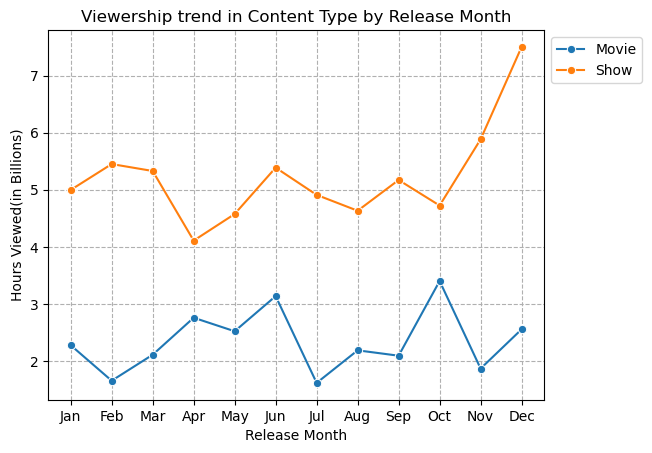

In [53]:
sns.lineplot(x= 'Release Month', y= 'Hours Viewed(in Billions)', data= monthly_viewership_by_type, hue= 'Content Type', marker= 'o')
plt.title('Viewership trend in Content Type by Release Month')
plt.legend(bbox_to_anchor= (1, 1))
plt.grid(ls= '--')
plt.show()

From the above trend, it's clear that shows are dominating the numbers each month. Especially, in the end of the year in December, there is a huge surge in viewership hour in shows which is possibly due to holiday period. Viewership hours of movies are fluctuating throughout the year with occasional growth in the month of June & October possibly due to specific releases.

Now let's see how is the release season affecting the viewership hours

For this purpose, I first divided the year into four typical season throughout the globe.
        --> Dec(12), Jan(1), Feb(2) --> Winter
        --> Mar(3), Apr(4), May(5) --> Spring
        --> June(6), July(7), Aug(8) --> Summer
        --> Sept(9), Oct(10), Nov(11) --> Fall
Then grouping by the season & summing it up, I found the total viewership hours.

In [57]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
data['Release Season'] = data['Release Month'].apply(get_season)
data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Release Season
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,English,Show,3.0,Spring
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,English,Show,1.0,Winter
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show,12.0,Winter
3,Wednesday: Season 1,Yes,2022-11-23,507700000,English,Show,11.0,Fall
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,English,Movie,5.0,Spring


In [58]:
season_wise_viewership = data.groupby('Release Season')['Hours Viewed'].sum().reset_index()
season_wise_viewership

,Release Season,Hours Viewed
0,Fall,90708800000
1,Spring,21397400000
2,Summer,21864600000
3,Winter,24431100000


In [59]:
season_wise_viewership['Hours Viewed(in Billions)'] = season_wise_viewership['Hours Viewed'].apply(lambda hour: hour / 1e9)
season_wise_viewership

,Release Season,Hours Viewed,Hours Viewed(in Billions)
0,Fall,90708800000,90.7088
1,Spring,21397400000,21.3974
2,Summer,21864600000,21.8646
3,Winter,24431100000,24.4311


For better visual representation of the data, I ordered the seasons in the following order ['Winter', 'Spring', 'Summer', 'Fall']. 
Since these are object type data(not integer/float type), I have to define the order in which I want the data. For that, I used pandas in-built function pd.Categorical(values, categories, ordered= True), It takes data I want to reorder in values, the order of the data I want in categories & ordered= True make sure the order is maintained. It will make the order of this object datatype as follows [winter < spring < summer < fall]. Then when I sort the data based off these values, it will order them accordingly. I reset the index & dropped it to remove the older index.
Then I plotted the barplot to see the total hours viewed per season.

In [61]:
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_wise_viewership['Release Season'] = pd.Categorical(season_wise_viewership['Release Season'], season_order, ordered= True)
season_wise_viewership = season_wise_viewership.sort_values('Release Season').reset_index(drop= True)
season_wise_viewership

,Release Season,Hours Viewed,Hours Viewed(in Billions)
0,Winter,24431100000,24.4311
1,Spring,21397400000,21.3974
2,Summer,21864600000,21.8646
3,Fall,90708800000,90.7088


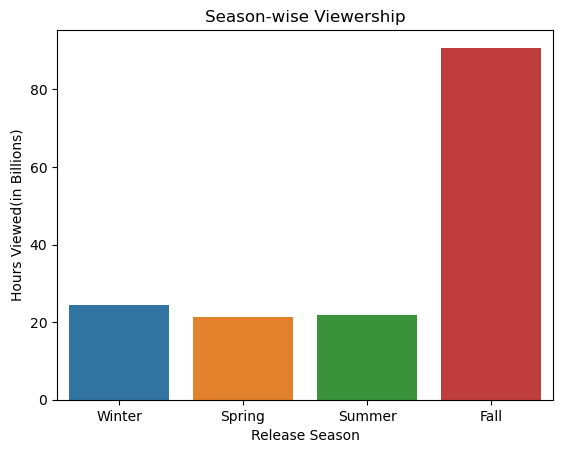

In [62]:
sns.barplot(x= 'Release Season', y= 'Hours Viewed(in Billions)', data= season_wise_viewership, hue= 'Release Season')
plt.title('Season-wise Viewership')
plt.show()

This graph indicates that viewership hour skyrocketed in fall season with more than 80B viewership hours, while in other seasons it maintained a stable viewership hour around 20B. It suggests Netflix experiences highest viewer engagement in Fall season.

Now, let's analyze the trend between number of content releases & their viewership hours throughout the year.

For this purpose, I first counted number of content released in each month(using .value_counts()) (Alternative method: data.groupby('Release Month')['Release Month'].size()). Then I sort the index to make the data in increasing order of months(using .sort_index()). Then I mapped the month numbers to its corresponding names(using .map()).

In [77]:
month_wise_release = data['Release Month'].value_counts().sort_index().reset_index()
month_wise_release

,Release Month,count
0,1.0,608
1,2.0,560
2,3.0,690
3,4.0,647
4,5.0,624
5,6.0,670
6,7.0,631
7,8.0,674
8,9.0,739
9,10.0,802


In [90]:
month_wise_release.rename(columns= {'count': 'No. of Releases'}, inplace= True)
month_wise_release['Release Month'] = month_wise_release['Release Month'].map(month_map)
month_wise_release

,Release Month,No. of Releases
0,Jan,608
1,Feb,560
2,Mar,690
3,Apr,647
4,May,624
5,Jun,670
6,Jul,631
7,Aug,674
8,Sep,739
9,Oct,802


Now, I'll plot the graph of number of releases per month & monthly viewership hours on the same plot to draw insights from the data.

In [82]:
monthly_viewer['Release Month'] =  monthly_viewer['Release Month'].map(month_map)

In [84]:
monthly_viewer

,Release Month,Hours Viewed,Hours Viewed(in Billions)
0,Jan,7271600000,7.2716
1,Feb,7103700000,7.1037
2,Mar,7437100000,7.4371
3,Apr,6865700000,6.8657
4,May,7094600000,7.0946
5,Jun,8522000000,8.5220
6,Jul,6524800000,6.5248
7,Aug,6817800000,6.8178
8,Sep,7262200000,7.2622
9,Oct,8123200000,8.1232


For plotting two graphs on same plot, I'll use plt.subplots() & then share the x-axis for both the plots(using ax2 = ax1.twinx()) making it in the left side y-axis corresponding to number of releases per month & right side y-axis corresponding to viewership hours per month.

In [92]:
month_wise_release

,Release Month,No. of Releases
0,Jan,608
1,Feb,560
2,Mar,690
3,Apr,647
4,May,624
5,Jun,670
6,Jul,631
7,Aug,674
8,Sep,739
9,Oct,802


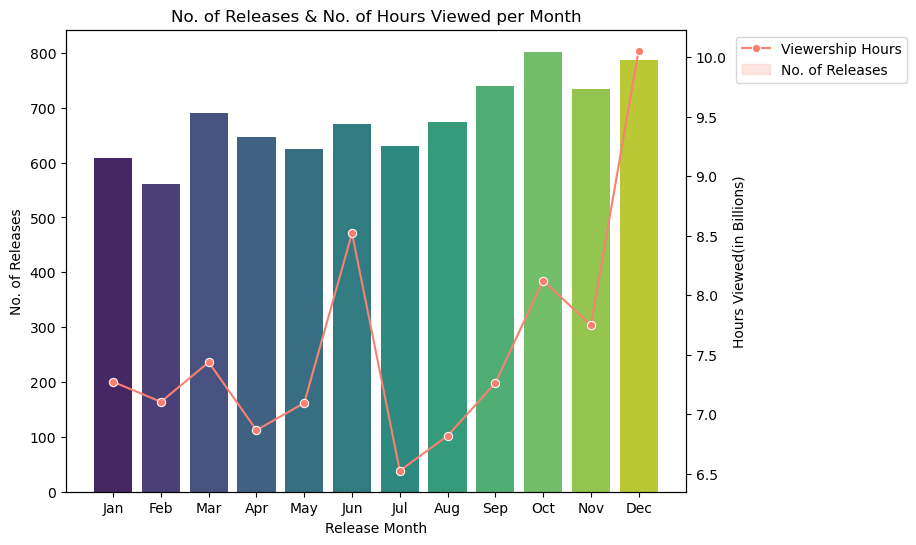

In [96]:
fig, ax1 = plt.subplots(figsize=(8, 6))
sns.barplot(x= 'Release Month', y= 'No. of Releases', data= month_wise_release, hue= 'Release Month', ax= ax1, palette='viridis')
ax2 = ax1.twinx()
sns.lineplot(x= 'Release Month', y= 'Hours Viewed(in Billions)', data= monthly_viewer, ax= ax2, marker= 'o', color= 'salmon')
plt.legend(['Viewership Hours', 'No. of Releases'], bbox_to_anchor= (1.07, 1))
plt.title('No. of Releases & No. of Hours Viewed per Month')
plt.show()

From the graph, we can see the number of releases is relatively steady throughout the year, while viewership hours experience a sharp increase in the month of June & a significant spike in the month of December. This indicates that viewership is not fully dependent on the number of releases, but also influenced by the timing & release of specific content during these months.

Now, let's see if Netflix has a preference for releasing content on specific weekdays & how this influences viewership

For this purpose, I'll first extract the day name from the release date(using .dt.day_name()). Then by grouping by the data on the basis of release day & then summing up the corresponding day's total viewership hours, I'llget total viewership hours per day. Then, using .pd.Categorical() & then .sort_values(), I'll order the weekdays in increasing order starting from Monday.

In [98]:
data['Release Day'] = data['Release Date'].dt.day_name()
data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Release Season,Release Day
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,English,Show,3.0,Spring,Thursday
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,English,Show,1.0,Winter,Thursday
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show,12.0,Winter,Friday
3,Wednesday: Season 1,Yes,2022-11-23,507700000,English,Show,11.0,Fall,Wednesday
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,English,Movie,5.0,Spring,Thursday


In [102]:
daywise_viewship = data.groupby('Release Day')['Hours Viewed'].sum().reset_index()
daywise_viewship['Hours Viewed(in Billions)'] = daywise_viewship['Hours Viewed'].apply(lambda hour: hour / 1e9)
daywise_viewship

,Release Day,Hours Viewed,Hours Viewed(in Billions)
0,Friday,38217200000,38.2172
1,Monday,3954500000,3.9545
2,Saturday,5121800000,5.1218
3,Sunday,1935300000,1.9353
4,Thursday,20292800000,20.2928
5,Tuesday,5562300000,5.5623
6,Wednesday,15744100000,15.7441


In [103]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daywise_viewship['Release Day'] = pd.Categorical(daywise_viewship['Release Day'], categories= day_order, ordered= True)
daywise_viewship = daywise_viewship.sort_values('Release Day').reset_index(drop= True)
daywise_viewship

,Release Day,Hours Viewed,Hours Viewed(in Billions)
0,Monday,3954500000,3.9545
1,Tuesday,5562300000,5.5623
2,Wednesday,15744100000,15.7441
3,Thursday,20292800000,20.2928
4,Friday,38217200000,38.2172
5,Saturday,5121800000,5.1218
6,Sunday,1935300000,1.9353


Now, I'll count the number of releases per day in a week using .value_counts(), then I'll sort it in increasing order of days starting from Monday.

In [105]:
daywise_releases = data['Release Day'].value_counts().reindex(day_order).reset_index()
daywise_releases.rename(columns= {'count': 'No. of Releases'}, inplace= True)
daywise_releases

,Release Day,No. of Releases
0,Monday,436
1,Tuesday,995
2,Wednesday,1310
3,Thursday,1145
4,Friday,3863
5,Saturday,238
6,Sunday,179


Now, I'll plot the graph for total number of releases & tottal viewership hours per day to see any trends if exist.

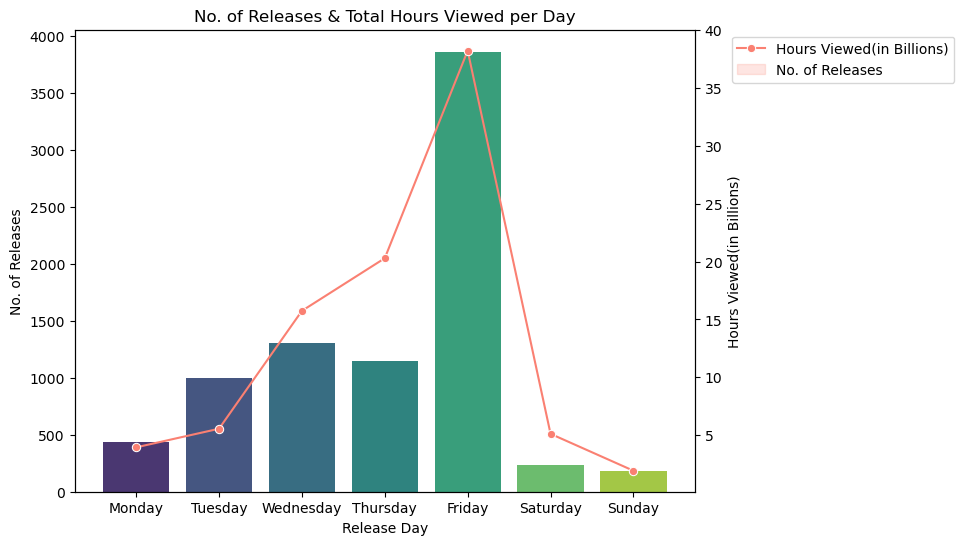

In [107]:
fig, ax1 = plt.subplots(figsize= (8, 6))
sns.barplot(x= 'Release Day', y= 'No. of Releases', data= daywise_releases, hue= 'Release Day', palette= 'viridis', ax= ax1)
ax2 = ax1.twinx()
sns.lineplot(x= 'Release Day', y= 'Hours Viewed(in Billions)', data= daywise_viewship, marker = 'o', color= 'salmon' , ax= ax2)
plt.title('No. of Releases & Total Hours Viewed per Day')
plt.legend(['Hours Viewed(in Billions)', 'No. of Releases'], bbox_to_anchor= (1.43, 1))
plt.show()

From the graph, we can see that the most content releases occur on Fridays, with viewership hours also peaking significantly on that day. This suggests that Netflix strategically releases content towards the weekend to maximize audience engagement. The viewership drops sharply on Saturdays & Sundays, which indicates that the audience tends to consume newly released content right at the start of the weekend, which makes Friday the most impactful day for both releases & viewership. 

**Conclusion**

So, the content strategy of netflix revolves around maximizing viewership through targeted release timing & content variety. Shows consistently draws more viewership than movies, which significantly spikes in June & December. The Fall season happens to be peak time for audience engagement. Most contents are released on Fridays to capture the viewers right before the weekend. From the data, we can see it actually draws more viewership on Fridays which shows Netflix's strategic brilliance to maximize the audience. 